# Chessman image Classification

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders

In [56]:
input_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Chessman image Classification\\Chessman-image-dataset\\Chess'
output_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Chessman image Classification\\Chessman-image-dataset\\Chess_Split'

In [57]:
#splitfolders.ratio(input=input_dir,output=output_dir,ratio=(0.8, 0.1, 0.1))

In [58]:
dataGen=ImageDataGenerator(rescale=1/255)

In [59]:
train_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Chessman image Classification\\Chessman-image-dataset\\Chess_Split\\train'
test_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Chessman image Classification\\Chessman-image-dataset\\Chess_Split\\test'
val_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Chessman image Classification\\Chessman-image-dataset\\Chess_Split\\val'

In [60]:
train_gen=dataGen.flow_from_directory(train_dir,target_size=(100, 100))
test_gen=dataGen.flow_from_directory(test_dir,target_size=(100, 100))
val_gen=dataGen.flow_from_directory(val_dir,target_size=(100, 100))

Found 436 images belonging to 6 classes.
Found 63 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [61]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
model=Sequential()

In [63]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(6,activation='softmax'))

In [64]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#early_stop= EarlyStopping(monitor='val_loss',patience=3,mode='min',verbose=False)

In [65]:
model.fit(train_gen,validation_data=test_gen,epochs=50)

Epoch 1/50
14/14 [==============================] - 17s 1s/step - loss: 1.9876 - accuracy: 0.1950 - val_loss: 1.7865 - val_accuracy: 0.2063
Epoch 2/50
14/14 [==============================] - 15s 1s/step - loss: 1.7542 - accuracy: 0.2775 - val_loss: 1.7635 - val_accuracy: 0.2381
Epoch 3/50
14/14 [==============================] - 15s 1s/step - loss: 1.6501 - accuracy: 0.3280 - val_loss: 1.7375 - val_accuracy: 0.2381
Epoch 4/50
14/14 [==============================] - 15s 1s/step - loss: 1.4739 - accuracy: 0.4266 - val_loss: 1.8681 - val_accuracy: 0.2381
Epoch 5/50
14/14 [==============================] - 15s 1s/step - loss: 1.2062 - accuracy: 0.5436 - val_loss: 1.8947 - val_accuracy: 0.3175
Epoch 6/50
14/14 [==============================] - 16s 1s/step - loss: 0.9652 - accuracy: 0.6399 - val_loss: 1.8722 - val_accuracy: 0.3333
Epoch 7/50
14/14 [==============================] - 16s 1s/step - loss: 0.7924 - accuracy: 0.6812 - val_loss: 2.1731 - val_accuracy: 0.3651
Epoch 8/50
14/14 [==

<AxesSubplot:>

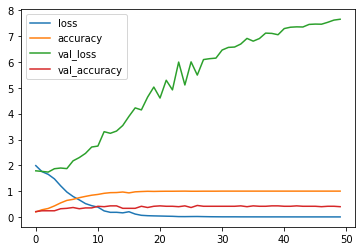

In [66]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [67]:
model.evaluate(test_gen)

2/2 [==============================] - 1s 453ms/step - loss: 7.6595 - accuracy: 0.3968


[7.659521579742432, 0.3968254029750824]